# Redes Neuronales - Trabajo Practico N°2 - Rossman Store Sales

## Full Model
- **¿Qué son los Entity Embeddings y cómo se relacionan con las variables categóricas?** 

Los Entity Embeddings son parámetros para representar la relación que tienen distintas variables para ser procesados de una manera más ordenada y fácil. Un problema en las redes neuronales es la forma en que un objeto es analizado por sus parámetros y luego como los relaciona entre sí, dado que todas las caracteristicas propias del objeto son discretas existe un problema de discontinuidad en los datos. Por eso los Entity Embeddings resuelven este problema creando una continuidad intrínseca entre los datos para que la red neuronal pueda obtener mejores resultados.

- **Explicación la métrica utilizada en la competencia.**

La métrica utilizada en la competencia es la Root Mean Square Percentage Error (RMSPE). Esta métrica a diferencia de la RMSE para el contexto del trabajo, nos permite independizar de la cantidad de ventas de cada local al ser un error porcentual y no absoluto. Entonces se pondera de igual forma las ventas de todos los lugares sin importart la cantidad de ventas.


In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary


In [2]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
df = pd.read_feather('../processed_dataset/train_normalized_data.fth')
df_test = pd.read_feather('../processed_dataset/test_normalized_data.fth')

In [4]:
cat_vars = ['Store', 
            'DayOfWeek', 
           'Year', 
            'Month', 
            'Day', 
            'StateHoliday', 
#            'CompetitionMonthsOpen', 
#            'Promo2Weeks', 
            'StoreType', 
            'Assortment', 
#            'PromoInterval', 
#            'CompetitionOpenSinceYear',  
            'State', 
#            'Promo2SinceYear',
            'Week', 
            'Events', 
#            'Promo_fw', 
#            'Promo_bw', 
            'StateHoliday_bool_fw',
            'StateHoliday_bool_bw', 
            'SchoolHoliday_fw', 
            'SchoolHoliday_bw'
]

In [5]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [6]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [7]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
StoreType,4
Assortment,3
State,12
Week,52


# Asignación de dimensión de embeddings

In [8]:
cat_var_dict = {'Store': 1115, 'DayOfWeek': 7, 'Year': 3, 'Month': 12,
'Day': 31, 'StateHoliday': 12, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 52, 'Events': 22, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 8, 'SchoolHoliday_fw': 8,
'SchoolHoliday_bw': 1}

# cat_var_dict = {'Store': 1115, 'DayOfWeek': 7, 'Year': 3, 'Month': 12,
# 'Day': 31, 'StateHoliday': 12, 'CompetitionMonthsOpen': 2,
# 'Promo2Weeks': 1, 'StoreType': 4, 'Assortment': 3, 'PromoInterval': 3,
# 'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 14,
# 'Week': 52, 'Events': 22, 'Promo_fw': 1,
# 'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
# 'StateHoliday_bool_bw': 8, 'SchoolHoliday_fw': 8,
# 'SchoolHoliday_bw': 1}

# cat_var_dict = {
#     'Store': 1115, 'DayOfWeek': 7, 'Year': 3, 'Month': 12, 'Week': 52, 'Day': 31,  'Events': 22,
#     'State': 12,  'StoreType': 4,  'Assortment': 3,
#     'PromoInterval': 4,
#     'Promo2SinceYear': 8,
#     'Promo2Weeks': 26,
#     'CompetitionMonthsOpen': 25,
#     'CompetitionOpenSinceYear': 21,
#     'Promo_fw': 6,'Promo_bw': 6,
#     'StateHoliday': 4, 'StateHoliday_bool_fw': 3, 'StateHoliday_bool_bw': 3, 
#     'SchoolHoliday_fw': 8,'SchoolHoliday_bw': 8}

In [9]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 1115 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 7 7 [0 1 2 3 4 5 6]

Year 3 3 [0 1 2]

Month 12 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 31 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 12 4 [0 1 2 3]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 52 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 22 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

StateHoliday_bool_fw 1 3 [0 1 2]

StateHoliday_bool_bw 8 3 [0 1 2]

SchoolHoliday_fw 8 8 [0 1 2 3 4 5 6 7]

SchoolHoliday_bw 1 8 [0 1 2 3 4 5 6 7]



# Definición de modelo

In [10]:
add_customers = True
log_output = True
output_activation = 'linear'

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [12]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [13]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [14]:
# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

In [15]:
first_hidden_units = 750
second_hidden_units = 750
l2_lambda = 1e-4
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

activation_csv = "relu"

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [16]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [17]:
# Descomentar para ver
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Year_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Month_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                              

In [18]:
model.save_weights('../model_data/initial_weights.hdf5')

In [19]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [20]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

In [21]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [22]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

C:\Users\phili\AppData\Local\Temp\ipykernel_544\3553976367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
C:\Users\phili\AppData\Local\Temp\ipykernel_544\3553976367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)
C:\Users\phili\AppData\Local\Temp\ipykernel_544\3553976367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [23]:
from tensorflow.keras import backend as K

In [24]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [25]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [26]:
get_metric(df_val, df_val['mean_by_store'])

0.3071746085338871

In [27]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [28]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # NormalizaciÃƒÂ³n
     y_mean = df_train[y_out_columns].mean().values
     y_std = df_train[y_out_columns].std().values
     y_train = (df_train[y_out_columns].values - y_mean)/y_std
     y_val = (df_val[y_out_columns].values - y_mean)/y_std
     y_max = df_train[y_out_columns].max().values
     y_train = df_train[y_out_columns].values/y_max
     y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [29]:
lr = 0.0008
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
if add_customers:
    checkpoint = ModelCheckpoint('../model_data/bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('../model_data/bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [31]:
epochs = 6
batch_size = 128
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=1)

Epoch 1/6
6359/6361 [============================>.] - ETA: 0s - loss: 0.0067 - Sales_loss: 8.0381e-04 - Customers_loss: 6.5451e-04 - Sales_mse: 8.0381e-04 - Sales_rmspe: 0.0243 - Customers_mse: 6.5451e-04 - Customers_rmspe: 0.0282
Epoch 1: val_Sales_mse improved from inf to 0.00021, saving model to ../model_data\bestmodel.hdf5
6361/6361 [==============================] - 168s 26ms/step - loss: 0.0067 - Sales_loss: 8.0367e-04 - Customers_loss: 6.5441e-04 - Sales_mse: 8.0367e-04 - Sales_rmspe: 0.0243 - Customers_mse: 6.5441e-04 - Customers_rmspe: 0.0282 - val_loss: 5.4439e-04 - val_Sales_loss: 2.1266e-04 - val_Customers_loss: 2.2696e-04 - val_Sales_mse: 2.1266e-04 - val_Sales_rmspe: 0.0175 - val_Customers_mse: 2.2696e-04 - val_Customers_rmspe: 0.0203
Epoch 2/6
6361/6361 [==============================] - ETA: 0s - loss: 4.7811e-04 - Sales_loss: 1.8674e-04 - Customers_loss: 2.0604e-04 - Sales_mse: 1.8674e-04 - Sales_rmspe: 0.0168 - Customers_mse: 2.0604e-04 - Customers_rmspe: 0.0199
Epoc

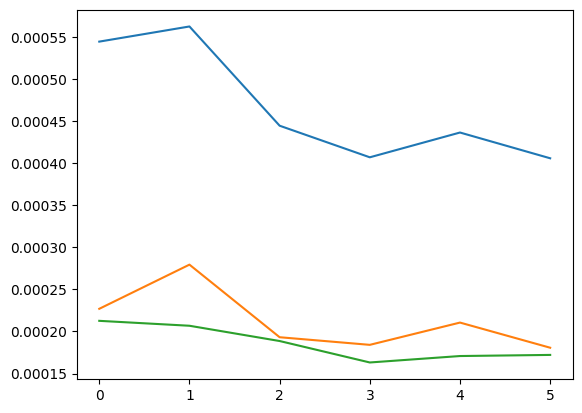

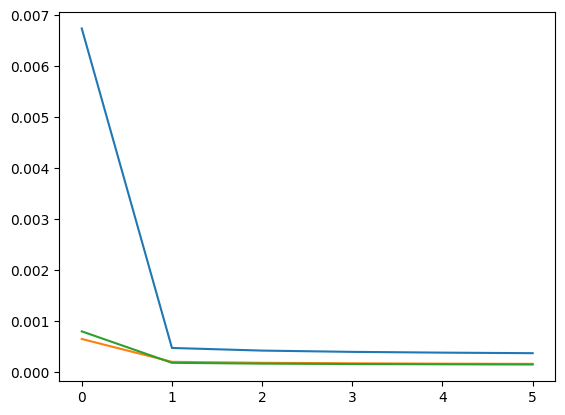

In [32]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_Customers_mse'])
plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['Customers_mse'])
plt.plot(history.history['Sales_mse'])

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [33]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 4.0579e-04 - Sales_loss: 1.7217e-04 - Customers_loss: 1.8071e-04 - Sales_mse: 1.7217e-04 - Sales_rmspe: 0.0157 - Customers_mse: 1.8071e-04 - Customers_rmspe: 0.0180


[0.00040578938205726445,
 0.00017217050481121987,
 0.00018071004888042808,
 0.00017217050481121987,
 0.015695704147219658,
 0.00018071004888042808,
 0.018009720370173454]

In [34]:
model.load_weights('../model_data/bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 4.0695e-04 - Sales_loss: 1.6319e-04 - Customers_loss: 1.8413e-04 - Sales_mse: 1.6319e-04 - Sales_rmspe: 0.0152 - Customers_mse: 1.8413e-04 - Customers_rmspe: 0.0180


[0.0004069458518642932,
 0.00016318623966071755,
 0.00018412985082250088,
 0.00016318623966071755,
 0.015188736841082573,
 0.00018412985082250088,
 0.01798710972070694]

In [35]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
         y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 7s 5ms/step


In [36]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.14427591392236405

# Baseline

In [37]:
sample_csv = pd.read_csv('../dataset/sample_submission.csv')

In [38]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [39]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [40]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4759.096031
1,2,6942.568678
2,6,8817.050891
3,7,5539.358418
4,8,6562.337612
5,9,5568.420918
6,10,8030.977041
7,11,7589.598214
8,12,5034.747182
9,13,5508.567394


In [41]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [42]:
sample_csv['Sales'] = df_test['Sales']

In [43]:
sample_csv.to_csv(f'../submision_data/submision_baseline.csv', index=False)

In [44]:
sample_csv.head()

,Id,Sales
0,1,4759.096031
1,2,6942.568678
2,3,8817.050891
3,4,5539.358418
4,5,6562.337612


# Sumbit a la competición y guardo datos

In [45]:
import datetime
import random
random.seed()

In [46]:

sample_csv = pd.read_csv('../dataset/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

sample_csv.to_csv(f'../submision_data/submision_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}-{batch_size}-{lr}.csv', index=False)


In [50]:
from openpyxl import load_workbook

book = load_workbook('../submision_data/pdutriez_submisions_data.xlsx')
writer = pd.ExcelWriter('../submision_data/pdutriez_submisions_data.xlsx', engine = 'openpyxl')
writer.book = book

prueba = 5
df1 = pd.DataFrame()
df1["Hiperparámetros"] = ["Learning Rate", "Epochs", "Batch Size", "Optimizer", "Loss",
                         "Metrics", "Activation Function", "Hidden Units 1", "Hidden Units 2", "Lambda"]
df1["Valores"] = [lr, epochs, batch_size,"mse","mse","relu",first_hidden_units, second_hidden_units, second_hidden_units, l2_lambda]
df2 = pd.DataFrame()
df2["Variable Categórica"] = cat_var_dict.keys()
df2["Usada"] = [x in cat_vars for x in cat_var_dict.keys()]
booleandf = df2.select_dtypes(include=[bool])
booleanDictionary = {True: 'Si', False: 'No'}
df2["Usada"] = df2["Usada"].map(booleanDictionary)
df2["Dimensión Embedding"] = cat_var_dict.values()
df_full = pd.concat([df1, df2], axis=1) 
df_full = df_full.fillna('')

df_full.to_excel(writer, sheet_name=f'Prueba_{prueba}', index=False)

writer.close()

C:\Users\phili\AppData\Local\Temp\ipykernel_544\3743983691.py:5: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


In [51]:
df_full

,Hiperparámetros,Valores,Variable Categórica,Usada,Dimensión Embedding
0,Learning Rate,0.0008,Store,Si,1115
1,Epochs,6,DayOfWeek,Si,7
2,Batch Size,128,Year,Si,3
3,Optimizer,mse,Month,Si,12
4,Loss,mse,Day,Si,31
5,Metrics,relu,StateHoliday,Si,12
6,Activation Function,750,CompetitionMonthsOpen,No,2
7,Hidden Units 1,750,Promo2Weeks,No,1
8,Hidden Units 2,750,StoreType,Si,2
9,Lambda,0.0001,Assortment,Si,3


# Analisis de embedings

In [52]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 7)


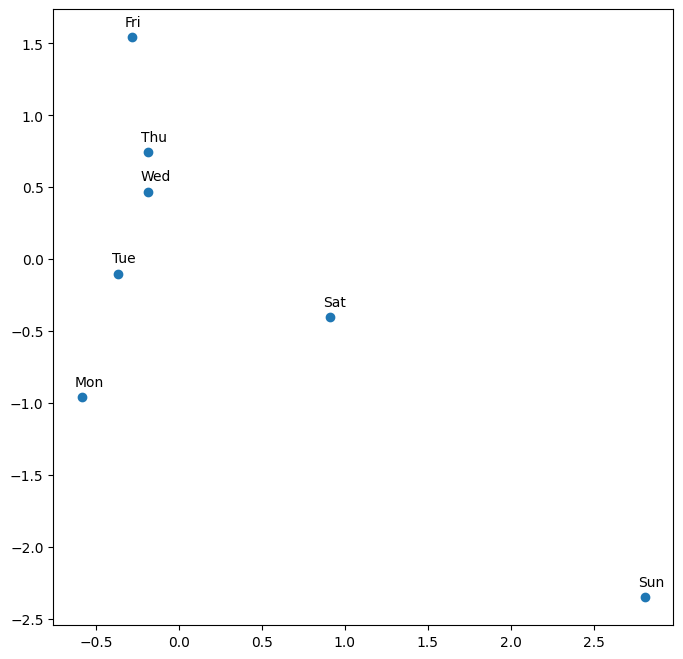

In [53]:
model.load_weights('../model_data/bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(12, 12)


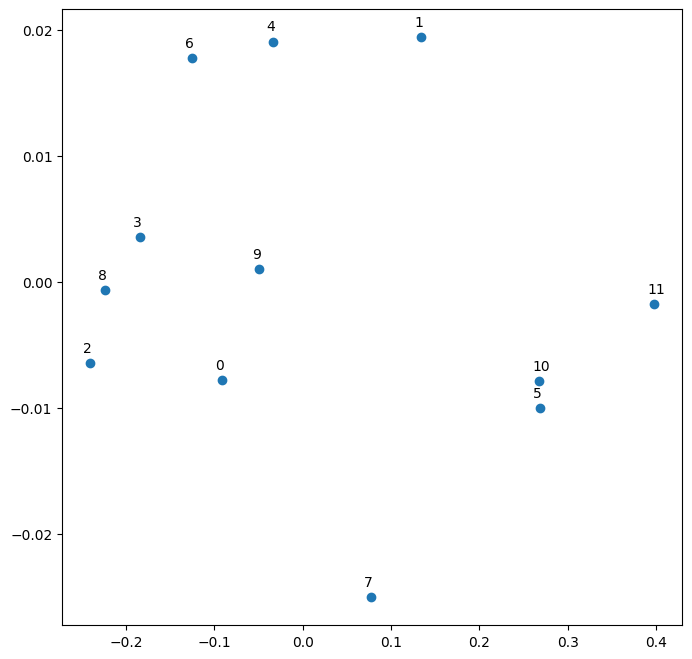

In [54]:
plot_embed('Month_Embed', list(range(12)))

In [55]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Store embeddings

In [56]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [57]:
submodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Year_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Month_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [58]:
submodel.save('../model_data/embeddings_model.hdf5')